In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
def conv1d(x, w, p=0, s=1):
    w_rotate = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad,
                                   x_padded,
                                   zero_pad])
        
    res = []
    for i in range(0, int(len(x)/s), s):
        res.append(np.sum(x_padded[i:i+w_rotate.shape[0]] * w_rotate))
        
    return np.array(res)

In [3]:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Conv1d Implementation:', conv1d(x, w, p=2, s=1))

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]


In [4]:
print('NumPy Results:', np.convolve(x, w, mode='same'))

NumPy Results: [ 5 14 16 26 24 34 19 22]


#### Performing a discrete convolution in 2D.

In [5]:
import scipy.signal

In [6]:
def conv2d(x, w, p=(0, 0), s=(1, 1)):
    w_rotate = np.array(w)[::-1, ::-1]
    x_orig = np.array(x)
    n1 = x_orig.shape[0] + 2*p[0]
    n2 = x_orig.shape[1] + 2*p[1]
    x_padded = np.zeros(shape=(n1, n2))
    x_padded[p[0]:p[0]+x_orig.shape[0],
             p[1]:p[1]+x_orig.shape[1]] = x_orig
    
    res = []
    for i in range(0, int((x_padded.shape[0] - w_rotate.shape[0]) / s[0]) + 1, s[0]):
        res.append([])
        
        for j in range(0, int((x_padded.shape[1] - w_rotate.shape[1]) / s[1]) + 1, s[1]):
            x_sub = x_padded[i:i+w_rotate.shape[0],
                             j:j+w_rotate.shape[1]]
            
            res[-1].append(np.sum(x_sub * w_rotate))
    return (np.array(res))

In [7]:
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Conv2d Implementation:\n', conv2d(X, W, p=(1, 1), s=(1, 1)))

Conv2d Implementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]


In [8]:
print('SciPy Results:\n', scipy.signal.convolve2d(X, W, mode='same'))

SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


### Loss functions for classification.

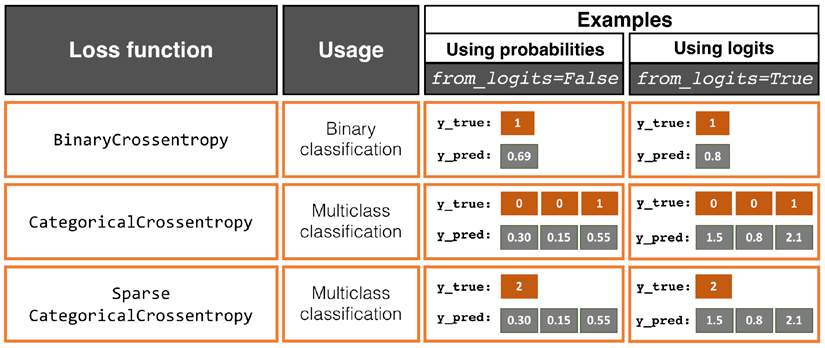

In [12]:
bce_probas = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce_logits = tf.keras.losses.BinaryCrossentropy(from_logits=True)

logits = tf.constant([0.8])
probas = tf.keras.activations.sigmoid(logits)


tf.print('BCE (w Probas: {:.4f})'.format(bce_probas(y_true=[1], y_pred=probas)),
         '(w Logits): {:.4f}'.format(bce_logits(y_true=[1], y_pred=logits)))

BCE (w probas: 0.3711) (w logits): 0.3711


In [19]:
cce_probas = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
cce_logits = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
probas = tf.keras.activations.softmax(logits)

tf.print('CCE (w Probas: {:.4f})'.format(cce_probas(y_true=[[0, 0, 1]], y_pred=probas)),
         '(w Logits: {:.4f})'.format(cce_logits(y_true=[[0, 0, 1]], y_pred=logits)))

CCE (w Probas: 0.5996) (w Logits: 0.5996)


In [20]:
sp_cce_probas = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
sp_cce_logits = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

logits = tf.constant([[1.5, 0.8, 2.1]])
probas = tf.keras.activations.softmax(logits)

tf.print('SP_CCE (w Probas: {:.4f})'.format(sp_cce_probas(y_true=[2], y_pred=probas)),
         '(w Logits: {:.4f})'.format(sp_cce_logits(y_true=[2], y_pred=logits)))

SP_CCE (w Probas: 0.5996) (w Logits: 0.5996)
